<a href="https://colab.research.google.com/github/SandipSolunke/Handwritten-Digit-Recognition-using-Neural-Network/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Recognition using Neural Network**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#importing data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Handwritten Digit Recognition /train.csv")

#splitting data into training and testing dataa
train_data=df.iloc[8400:,:]
test_data=df.iloc[:8400,:]

#separating input and output data
x_train=np.array(train_data.iloc[:,1:])
y_train=np.array(train_data.iloc[:,:1])

x_test=np.array(test_data.iloc[:,1:])
y_test=np.array(test_data.iloc[:,:1])

In [ ]:
#one hot encoding 
maxvalue=y_train.max()+1
y_train_ohc=np.eye(maxvalue)[y_train]

In [ ]:
#scaling data using min-max scaling
x_train_norm = (x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train))
x_test_norm=x_test/255

In [ ]:
#function to calculate mean squared error
def MSE(y_pred,y_true):
  error=0
  for i in range(y_true.size):
    error+=(y_true[i]-y_pred[i])**2
  error/=y_true.size

  return error

#activation functions
def Sigmoid(net):
  return 1/(1+np.exp(-net))

def Relu(x):
    return x * (x > 0)

#deravative of ReLU
def der_Relu(x):
    return 1. * (x > 0)

In [ ]:
#function to calculate accuracy
def Accuracy(x,y):
  counter=0
  for i in range(x.size):
    if(int(x[i])==int(y[i])):
      counter+=1
  
  return (counter/x.size)*100

In [ ]:
#function to train model
def train(x_train,w_ih,w_ho,y_train,epochs,c):
  for i in range(epochs):
    for (x,y) in zip(x_train,y_train):

      ##Forward Propagation
      #hidden layer
      net_h=np.matmul(w_ih,x)
      output_h=Relu(net_h)

      #output layer
      net_o=np.matmul(w_ho,output_h)
      output_o=Sigmoid(net_o)

      #Back Propagation
      #cost
      cost=MSE(output_o,y[0])

      #error
      error_o=y[0]-output_o
      error_h=np.matmul(error_o,w_ho)

      output_o=np.array([output_o])
      error_o=np.array([error_o])
      error_h=np.array([error_h])

      #calculating delta_w
      der_o=np.multiply(output_o,1-output_o)
      der_h=der_Relu(output_h)

      param_o=c*der_o*error_o
      param_h=c*der_h*error_h

      dw_ho=np.matmul(param_o.transpose(),np.array([output_h]))
      dw_ih=np.matmul(param_h.transpose(),np.array([x]))

      #updating weights
      w_ho=dw_ho+w_ho
      w_ih=dw_ih+w_ih
      
  return w_ih,w_ho


In [ ]:
#Initalizing Wights with random numbers
w_ih=np.random.randn(350, 784)
w_ho=np.random.randn(10,350)

epochs=10
c=0.05
w1,w2=train(x_train_norm,w_ih,w_ho,y_train_ohc,epochs,c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


In [ ]:
#function to predict output
def predict(x,w1,w2):
  n=int(x.size/x[0].size)
  y_pred=np.zeros(n)
  for i in range(n):

    net1=np.matmul(w1,x[i])
    output1=np.zeros(net1.size)
    for j in range(net1.size):
      output1[j]=Relu(net1[j])

    net2=np.matmul(w2,output1)

    output2=np.zeros(net2.size)
    for k in range(net2.size):
      output2[k]=Sigmoid(net2[k])
    
    y_pred[i]=np.argmax(output2)

  return y_pred

In [ ]:
y_pred=predict(x_train_norm,w1,w2)
print("Accuracy of model over training data :",Accuracy(y_train,y_pred))

y_pred=predict(x_test_norm,w1,w2)
print("Accuracy of model over testing data :",Accuracy(y_test,y_pred))

Accuracy of model over training data : 97.60714285714286
Accuracy of model over testing data : 94.65476190476191


Prediction : 3
True Result : 3


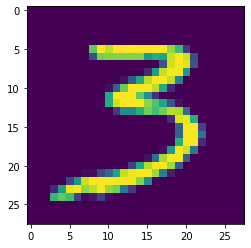

In [ ]:
#sample prediction
x=25
print("Prediction :",int(y_pred[x]))
print("True Result :",int(y_test[x]))
plt.imshow(x_test[x].reshape(28,28))